In [1]:
!pip install langgraph typing

In [16]:
from langgraph.graph import StateGraph
from typing import Dict, TypedDict, List

In [53]:
def multiply(values):
  print(values)
  answer = values[0]

  for j in range(1,len(values)):
    answer *= values[j]

  return answer

def subtract(values):
  answer = values[0]

  for j in range(1,len(values)):
    answer -= values[j]

  return answer

In [54]:
class AgentState1(TypedDict):
  message: str
  values: List[int]
  operator: str

def calculatorNode(state:AgentState1) -> AgentState1:
  if state["operator"] == '+':
    state["message"] = f"Hi {state['message']} Your Answer is {sum(state['values'])}"
  elif state["operator"] == '-':
    state["message"] = f"Hi {state['message']} Your Answer is {subtract(state['values'])}"
  elif state["operator"] == '*':
    print("multiplying")
    state["message"] = f"Hi {state['message']} Your Answer is {multiply(state['values'])}"
  else:
    state["message"] = f"Hi {state['message']} Wrong Operator"

  return state



In [55]:
graph = StateGraph(AgentState1)
graph.add_node("calculator",calculatorNode)
graph.set_entry_point("calculator")
graph.set_finish_point("calculator")

app = graph.compile()

In [27]:
!pip install Ipython

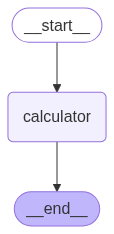

In [47]:
from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png()))

In [62]:
result = app.invoke({
    "message": "saad",
    "values": [1,2,3,4,5],
    "operator": "0"
    })


In [63]:
result['message']

'Hi saad Wrong Operator'